In [67]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import sys
MODULE_PATH = '/Users/anhyojun/VSCode/K-Digital Training/MyModule'
sys.path.append(MODULE_PATH)
from KDTModule import *

In [45]:
# 시드 설정
torch.manual_seed(1)

In [18]:
# 데이터 불러오기
PATH = 'twitter/Twitter_Data.csv'
twitter = pd.read_csv(PATH)
print(f'Data Shape : {twitter.shape}')
twitter.head()

Data Shape : (162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [19]:
# 데이터 프레임 정보 확인
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [20]:
# 결측치 확인
twitter.isna().sum()

clean_text    4
category      7
dtype: int64

In [23]:
# 결측치 제거
twitter.dropna(inplace = True)
twitter.isna().sum()

clean_text    0
category      0
dtype: int64

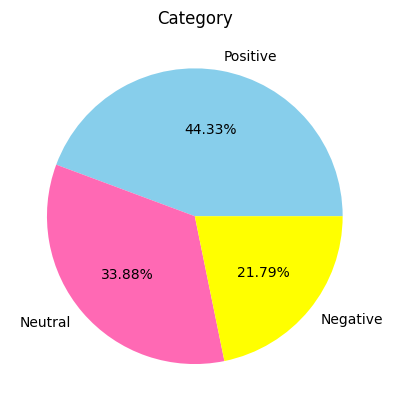

In [15]:
# 타겟 레이블 비율 시각화
plt.pie(twitter['category'].value_counts(), labels = ['Positive', 'Neutral', 'Negative'],
        autopct = '%.2f%%', colors = ['skyblue', 'hotpink', 'yellow'])
plt.title('Category')
plt.show()

> 긍정 : 44.33%, 중립 : 33.88%, 부정 : 21.79%

In [32]:
# 타겟 레이블 범주 (0, 1, 2)로 바꾸기
twitter['category'] = twitter['category'].replace(-1, 2)
twitter # 0: 중립, 1: 긍정, 2: 부정

,clean_text,category
0,when modi promised “minimum government maximum...,2.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,2.0
162976,dear rss terrorist payal gawar what about modi...,2.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [57]:
# 훈련, 검증, 테스트 데이터 분리
featureDF = twitter[['clean_text']]
targetDF = twitter[['category']]

train_inputDF, test_inputDF, train_targetDF, test_targetDF = train_test_split(featureDF, targetDF,
                                                                      stratify = targetDF,
                                                                      train_size = 0.8, random_state = 42)
train_inputDF, valid_inputDF, train_targetDF, valid_targetDF = train_test_split(train_inputDF, train_targetDF,
                                                                        stratify = train_targetDF,
                                                                        train_size = 0.8, random_state = 42)

In [116]:
print(f"[train] input : {train_inputDF.shape}, target : {train_targetDF.shape}")
print(f"[valid] input : {valid_inputDF.shape}, target : {valid_targetDF.shape}")
print(f"[test] input : {test_inputDF.shape}, target : {test_targetDF.shape}")

[train] input : (104300, 1), target : (104300, 1)
[valid] input : (26075, 1), target : (26075, 1)
[test] input : (32594, 1), target : (32594, 1)


In [162]:
vectorizer = TfidfVectorizer(max_features = 8000) 
a = []
b = vectorizer.fit_transform(train_inputDF['clean_text'])
for i in b:
    a.append(i)
    break

In [166]:
for i in a:
    print(i)

  (0, 5468)	0.15041694187914165
  (0, 3654)	0.17953274843671835
  (0, 830)	0.21785044377678014
  (0, 6998)	0.1464670857178489
  (0, 6565)	0.1277816210283111
  (0, 145)	0.1930593246697183
  (0, 5586)	0.28578882391942545
  (0, 410)	0.13074628859946594
  (0, 3570)	0.27517323819154965
  (0, 7189)	0.13623095983367775
  (0, 4246)	0.19474084976970554
  (0, 2593)	0.12909761867496797
  (0, 1663)	0.11192951485241506
  (0, 2955)	0.2646632944984971
  (0, 190)	0.20517555842941235
  (0, 5419)	0.14807190050576555
  (0, 1773)	0.28334930656537366
  (0, 383)	0.10077258789365863
  (0, 1541)	0.2789879224794591
  (0, 4740)	0.21364434875483676
  (0, 2009)	0.18673474234738682
  (0, 4925)	0.14785114664590265
  (0, 7203)	0.23672517340473093
  (0, 7971)	0.08591726747128127
  (0, 7879)	0.1932328937647013
  (0, 335)	0.18788876830674373
  (0, 4500)	0.14725219094833883


In [161]:
train_inputDF['clean_text'][36700]

'many agree with you the need defeat the modishah combine all costs please accept seatsharing formula with the congress even less than ideal also principle aap should support the basic income poor'

In [160]:
a

[<1x8000 sparse matrix of type '<class 'numpy.float64'>'
 	with 27 stored elements in Compressed Sparse Row format>]

In [113]:
vectorizer = TfidfVectorizer(max_features = 8000) # 최대 8000개의 특징 선택
train_vectors = vectorizer.fit_transform(train_inputDF['clean_text']).toarray()
valid_vectors = vectorizer.transform(valid_inputDF['clean_text']).toarray()
test_vectors = vectorizer.transform(test_inputDF['clean_text']).toarray()

In [121]:
train_vectorsDF = pd.DataFrame(train_vectors)
valid_vectorsDF = pd.DataFrame(valid_vectors)
test_vectorsDF = pd.DataFrame(test_vectors)
train_vectorsDF

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
class CustomDataset2(Dataset):
    def __init__(self, featureDF, targetDF):
        super().__init__()
        self.featureDF = featureDF
        self.targetDF = targetDF
        self.n_rows = featureDF.shape[0]
        self.n_features = featureDF.shape[1]

    def __len__(self):
        return self.n_rows

    def __getitem__(self, idx):
        featureTS = torch.FloatTensor(self.featureDF.iloc[idx].values).unsqueeze(0)  # 2차원으로 변환
        targetTS = torch.FloatTensor(self.targetDF.iloc[idx].values)
        return featureTS, targetTS

In [147]:
trainDS = CustomDataset2(train_vectorsDF, train_targetDF)
validDS = CustomDataset2(valid_vectorsDF, valid_targetDF)
testDS = CustomDataset2(test_vectorsDF, test_targetDF)

trainDL = DataLoader(trainDS, batch_size=64)
validDL = DataLoader(validDS, batch_size=64)
testDL = DataLoader(testDS, batch_size=64)

In [148]:
trainDL.dataset[0][0].shape

torch.Size([1, 8000])

In [149]:
for X_batch, y_batch in trainDL:
    print(X_batch.shape)  # X_batch의 차원 출력
    break  # 첫 번째 배치만 확인하기 위해 루프를 중지

torch.Size([64, 1, 8000])


In [150]:
model = LSTMModel(input_size = 8000, output_size = 3, hidden_list = [100, 50],
                  act_func=F.relu, model_type='multiclass', num_layers=1)
# num_layers : 재귀층(Recurrent Layer)의 개수 (기본적인 LSTM 모델에서는 1개)

In [151]:
adam_optim = optim.Adam(model.parameters(), lr = 0.001)

In [152]:
# 모델 훈련
EPOCH = 2
SAVE_PATH = '/Users/anhyojun/VSCode/K-Digital Training/김소현 강사님/프로젝트/4번째 프로젝트/model'
result = training(trainDL, validDL, model, 'multiclass', adam_optim, EPOCH,
                  endurance_cnt=5, num_classes=10, SAVE_PATH=SAVE_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/2] Train : 0.3951, Test : 0.2325
[Score  : 1/2] Train : 0.8462, Test : 0.9319
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/2] Train : 0.1747, Test : 0.2110
[Score  : 2/2] Train : 0.9486, Test : 0.9358


In [153]:
# 모델 훈련
EPOCH = 2
SAVE_PATH = '/Users/anhyojun/VSCode/K-Digital Training/김소현 강사님/프로젝트/4번째 프로젝트/model'
result = training(trainDL, validDL, model, 'multiclass', adam_optim, EPOCH,
                  endurance_cnt=5, num_classes=3, SAVE_PATH=SAVE_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/2] Train : 0.1386, Test : 0.2150
[Score  : 1/2] Train : 0.9587, Test : 0.9348
[Loss : 2/2] Train : 0.1110, Test : 0.2310
[Score  : 2/2] Train : 0.9651, Test : 0.9349
